# Downloading the Dataset

In [1]:
# Installing required packages (only run once if not installed)
# %pip install kagglehub
# %pip install pandas
# %pip install openpyxl   

In [2]:
# Importing necessary libraries
import pandas as pd       # parse CSV data / explore data
import kagglehub          # download dataset CSVs
import os                 # create CSV paths and handle filesystem

In [3]:
# Download latest version
path = kagglehub.dataset_download("hmavrodiev/london-bike-sharing-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\m\.cache\kagglehub\datasets\hmavrodiev\london-bike-sharing-dataset\versions\1


In [4]:
# Get the CSV filename : full path(s) from KaggleHub dataset folder path
def find_csv_files(path):
    csv_paths = {}

    for root, _, files in os.walk(path):
        for f in files:
            if f.lower().endswith(".csv"):
                if f not in csv_paths:
                    csv_paths[f] = []
                csv_paths[f].append(os.path.join(root, f))

    if not csv_paths:
        raise FileNotFoundError(f"No .csv files found in dataset")

    return csv_paths

csv_paths = find_csv_files(path)
print(csv_paths)

{'london_merged.csv': ['C:\\Users\\m\\.cache\\kagglehub\\datasets\\hmavrodiev\\london-bike-sharing-dataset\\versions\\1\\london_merged.csv']}


# Exploring the Dataset
(objectives? why are we exploring / pulling specific aspects, what do we want to know about the dataset before proceeding)

In [5]:
# Read in CSV file as pandas dataframe
bikes = pd.read_csv(csv_paths['london_merged.csv'][0])
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [6]:
# Show dataset
bikes

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [7]:
# count the unique values in the weather_code column
bikes.weather_code.value_counts()

weather_code
1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: count, dtype: int64

In [8]:
# count the unique values in the season column
bikes.season.value_counts()

season
0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: count, dtype: int64

In [9]:
# Renaming the columns
new_cols_dict = {
    'timestamp':'time',
    'cnt':'count', 
    't1':'temp_real_C',
    't2':'temp_feels_like_C',
    'hum':'humidity_percent',
    'wind_speed':'wind_speed_kph',
    'weather_code':'weather',
    'is_holiday':'is_holiday',
    'is_weekend':'is_weekend',
    'season':'season'
}

# Renaming the columns to the specified column names
bikes.rename(new_cols_dict, axis=1, inplace=True)

In [10]:
# changing humidity balues to percentages
bikes.humidity_percent = bikes.humidity_percent / 100

In [11]:
# creating a season dictionary to map the integers to seasons
season_dict = {
    '0.0':'Spring',
    '1.0':'Summer',
    '2.0':'Autumn',
    '3.0':'Winter'
}

# creating a weather dictionary to map the weather_code to weather states
weather_dict = {
    '1.0':'Clear',
    '2.0':'Scattered clouds',
    '3.0':'Broken clouds',
    '4.0':'Cloudy',
    '7.0':'Rain',
    '10.0':'Rain with thunderstorm',
    '26.0':'Snowfall'
}

# changing the seasons column data type to string
bikes.season = bikes.season.astype('str')
# mapping the values 0-3 to the actual written seasons
bikes.season = bikes.season.map(season_dict)

# changing the weather column data type to string
bikes.weather = bikes.weather.astype('str')
# mapping the values to the actual written weathers
bikes.weather = bikes.weather.map(weather_dict)

In [12]:
# convert to datetime (do this ONCE)
bikes['time'] = pd.to_datetime(bikes['time'])

# time-based features
bikes['year'] = bikes['time'].dt.year
bikes['month'] = bikes['time'].dt.month
bikes['month_name'] = bikes['time'].dt.month_name()

bikes['day'] = bikes['time'].dt.day
bikes['dayofweek'] = bikes['time'].dt.dayofweek      # 0=Mon, 6=Sun
bikes['day_name'] = bikes['time'].dt.day_name()

bikes['hour'] = bikes['time'].dt.hour

In [13]:
# checking our dataframe to see the additions to table
bikes

,time,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season,year,month,month_name,day,dayofweek,day_name,hour
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,Broken clouds,0.0,1.0,Winter,2015,1,January,4,6,Sunday,0
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,Clear,0.0,1.0,Winter,2015,1,January,4,6,Sunday,1
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,Clear,0.0,1.0,Winter,2015,1,January,4,6,Sunday,2
3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,Clear,0.0,1.0,Winter,2015,1,January,4,6,Sunday,3
4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,Clear,0.0,1.0,Winter,2015,1,January,4,6,Sunday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,0.810,19.0,Broken clouds,0.0,0.0,Winter,2017,1,January,3,1,Tuesday,19
17410,2017-01-03 20:00:00,541,5.0,1.0,0.810,21.0,Cloudy,0.0,0.0,Winter,2017,1,January,3,1,Tuesday,20
17411,2017-01-03 21:00:00,337,5.5,1.5,0.785,24.0,Cloudy,0.0,0.0,Winter,2017,1,January,3,1,Tuesday,21
17412,2017-01-03 22:00:00,224,5.5,1.5,0.760,23.0,Cloudy,0.0,0.0,Winter,2017,1,January,3,1,Tuesday,22


# VISUALIZING THE DATASET

In [14]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import numpy as np

In [15]:
sns.set_theme(style="whitegrid")

## Temporal Data

### Bike Shares by Year

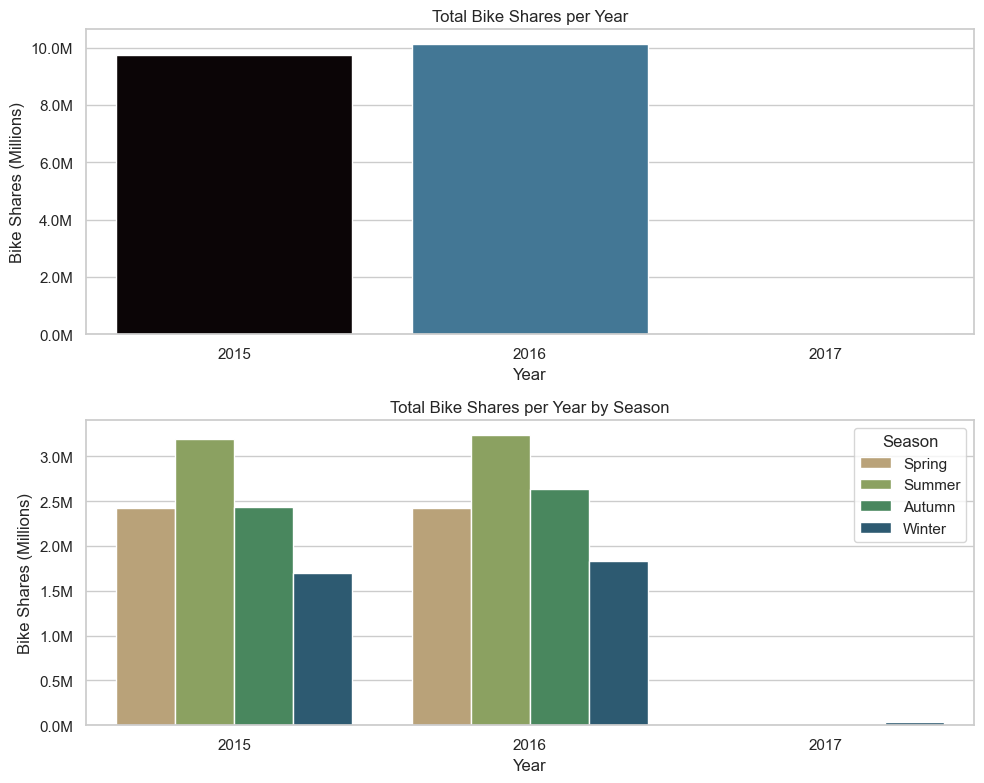

In [16]:
fig, axes = plt.subplots(2, 1, figsize=(10,8))

# 1) Total Bike Shares per Year
sns.barplot(
    data=bikes,
    x='year',
    y='count',
    estimator='sum',
    palette='mako',
    hue='year',
    errorbar=None,
    legend=None,
    ax=axes[0]
)

axes[0].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M')) # format to millions
axes[0].set_title("Total Bike Shares per Year")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Bike Shares (Millions)")

# 2) Total Bike Shares per Year by Season
season_order = ["Spring", "Summer", "Autumn", "Winter"]

sns.barplot(
    data=bikes,
    x='year',
    y='count',
    estimator='sum',
    palette='gist_earth_r',
    hue='season',
    hue_order=season_order,
    errorbar=None,
    ax=axes[1]
)

axes[1].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
axes[1].set_title("Total Bike Shares per Year by Season")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Bike Shares (Millions)")
axes[1].legend(title="Season")



plt.tight_layout()
plt.show()

### Bike Shares by Seasons

<Figure size 640x480 with 0 Axes>

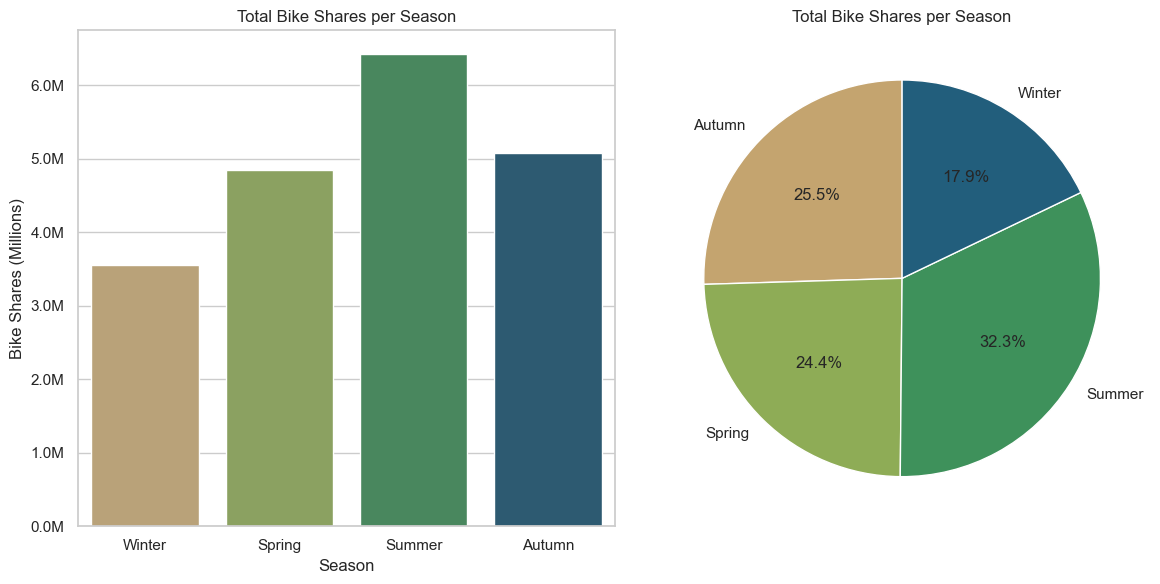

<Figure size 640x480 with 0 Axes>

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# 1) Total Bike Shares Per Season (Bar Chart)
sns.barplot(
    data=bikes,
    x='season',
    y='count',
    estimator='sum',
    palette='gist_earth_r',
    hue='season',
    errorbar=None,
    ax=axes[0]
)

axes[0].set_title("Total Bike Shares per Season")
axes[0].set_xlabel("Season")
axes[0].set_ylabel("Bike Shares (Millions)")

axes[0].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

# 2) Total Bike Shares Per Season (Pie Chart)

season_totals = bikes.groupby('season')['count'].sum()

axes[1].pie(
    season_totals.values,
    labels=season_totals.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('gist_earth_r', len(season_totals))
)

axes[1].set_title("Total Bike Shares per Season")
axes[1].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

plt.tight_layout()
plt.figure()


### Bike Shares by Months

C:\Users\m\AppData\Local\Temp\ipykernel_18856\2114304573.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(month_labels)
C:\Users\m\AppData\Local\Temp\ipykernel_18856\2114304573.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(month_labels)


Text(0, 0.5, 'Bike Shares (Millions)')

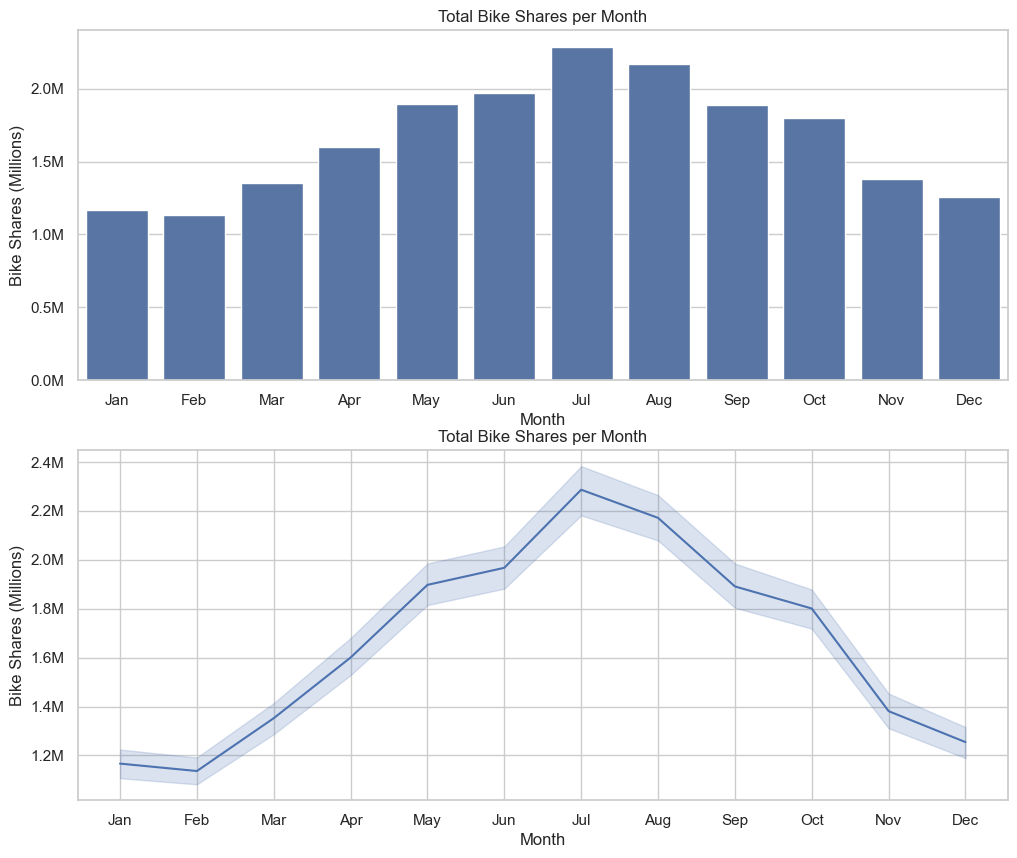

In [18]:
fig, axes = plt.subplots(2, 1, figsize=(12,10))

# 1)
sns.barplot(
    data=bikes,
    x='month_name',
    y='count',
    estimator='sum',
    errorbar=None,
    ax = axes[0]
)

axes[0].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M')) # format to millions

month_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
axes[0].set_xticklabels(month_labels)

axes[0].set_title("Total Bike Shares per Month")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Bike Shares (Millions)")

# 2)
sns.lineplot(
    data=bikes,
    x='month',
    y='count',
    estimator='sum',
    ax = axes[1]
)

axes[1].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M')) # format to millions
axes[1].set_xticklabels(month_labels)
axes[1].set_xticks(range(1, 13))
axes[1].set_title("Total Bike Shares per Month")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Bike Shares (Millions)")


### Bike Shares per Day of Month

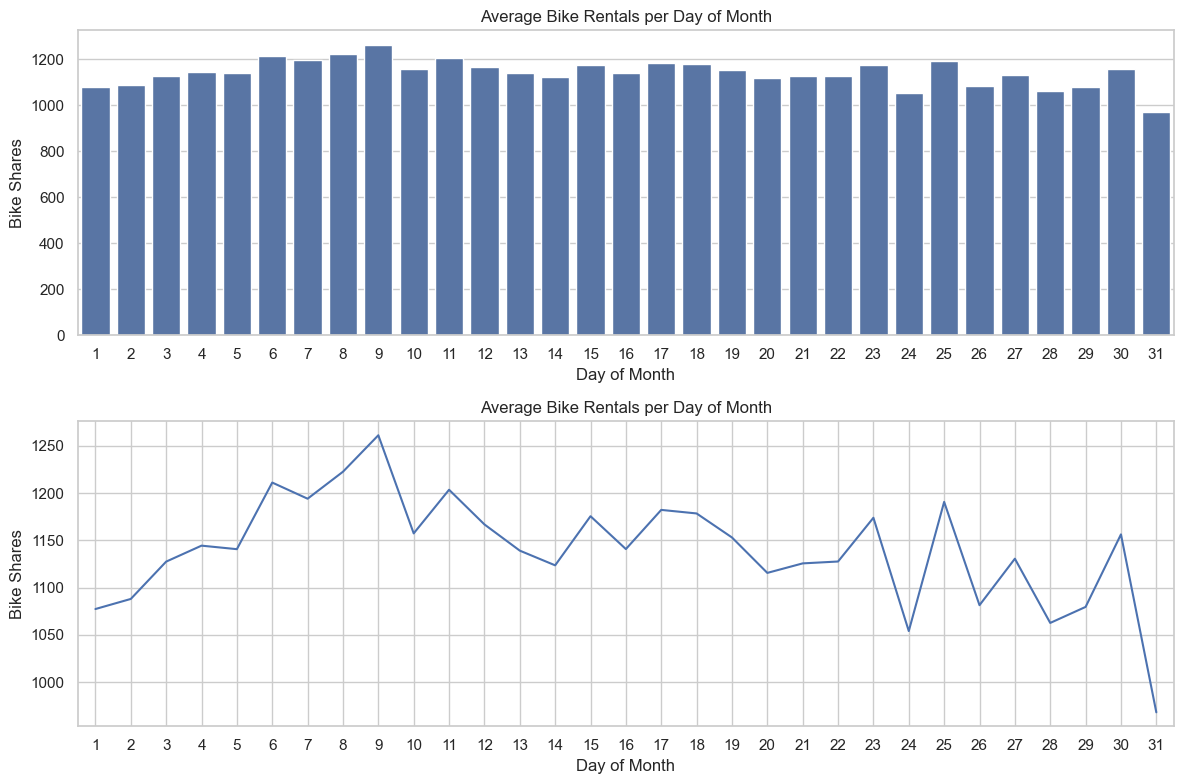

In [19]:
fig, axes = plt.subplots(2, 1, figsize=(12,8))

sns.barplot(
    data=bikes,
    x='day',
    y='count',
    errorbar=None,
    estimator='mean',
    ax=axes[0]
)
axes[0].set_title("Average Bike Rentals per Day of Month")
axes[0].set_ylabel("Bike Shares")
axes[0].set_xlabel("Day of Month")
axes[0].set_xlim(-0.5, 30.5)  # Set limits for bar plot
axes[0].set_xticks(range(31))  # Set tick positions
axes[0].set_xticklabels(range(1, 32))  # Label them 1-31

sns.lineplot(
    data=bikes,
    x='day',
    y='count',
    errorbar=None,
    estimator='mean',
    ax=axes[1]
)
axes[1].set_title("Average Bike Rentals per Day of Month")
axes[1].set_ylabel("Bike Shares")
axes[1].set_xlabel("Day of Month")
axes[1].set_xlim(0.5, 31.5)  # Set limits for line plot
axes[1].set_xticks(range(1, 32))  # Set ticks at 1-31

plt.tight_layout()
plt.show()

### Bike Shares by Weekday

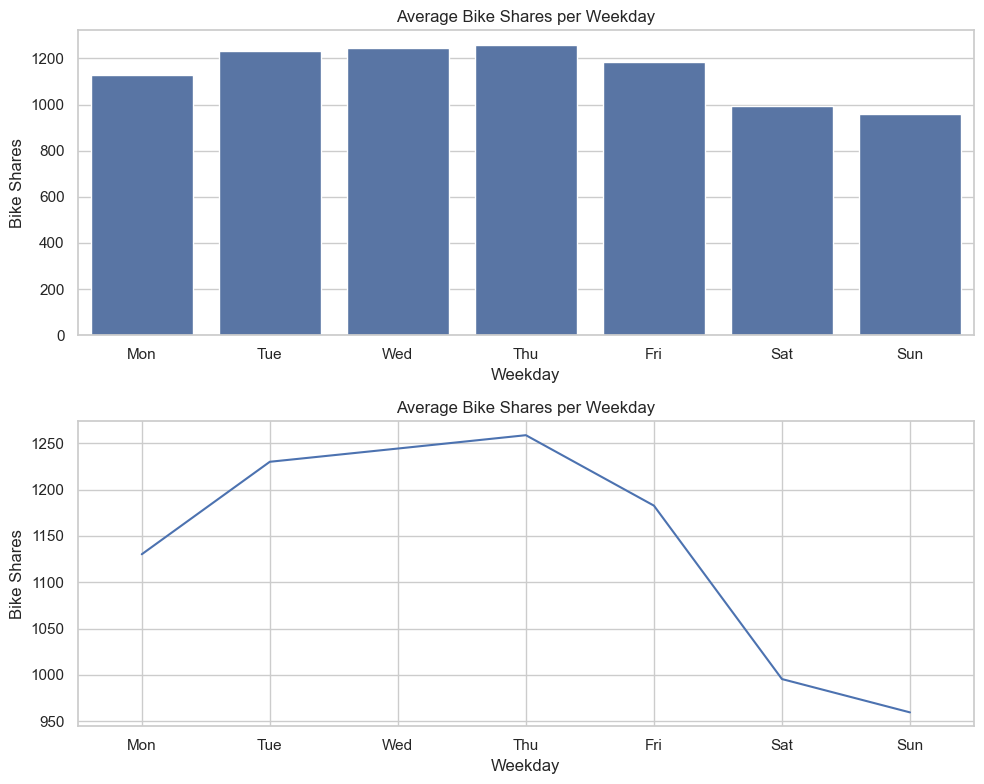

In [44]:
fig, axes = plt.subplots(2, 1, figsize=(10,8))

sns.barplot(
    data=bikes,
    x='dayofweek',
    y='count',
    estimator='mean',
    errorbar=None,
    ax=axes[0]
)

weekday_labels = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
axes[0].set_xlim(-0.5, 6.5)  # Set limits for bar plot
axes[0].set_xticks(range(7))  # Set tick positions 0-6
axes[0].set_xticklabels(weekday_labels)
axes[0].set_title("Average Bike Shares per Weekday")
axes[0].set_xlabel("Weekday")
axes[0].set_ylabel("Bike Shares")

sns.lineplot(
    data=bikes,
    x='dayofweek',
    y='count',
    estimator='mean',
    errorbar=None,
    ax=axes[1]
)

axes[1].set_xlim(-0.5, 6.5)  # Set same limits for line plot
axes[1].set_xticks(range(7))  # Set tick positions 0-6
axes[1].set_xticklabels(weekday_labels)
axes[1].set_title("Average Bike Shares per Weekday")
axes[1].set_xlabel("Weekday")
axes[1].set_ylabel("Bike Shares")

plt.tight_layout()
plt.show()

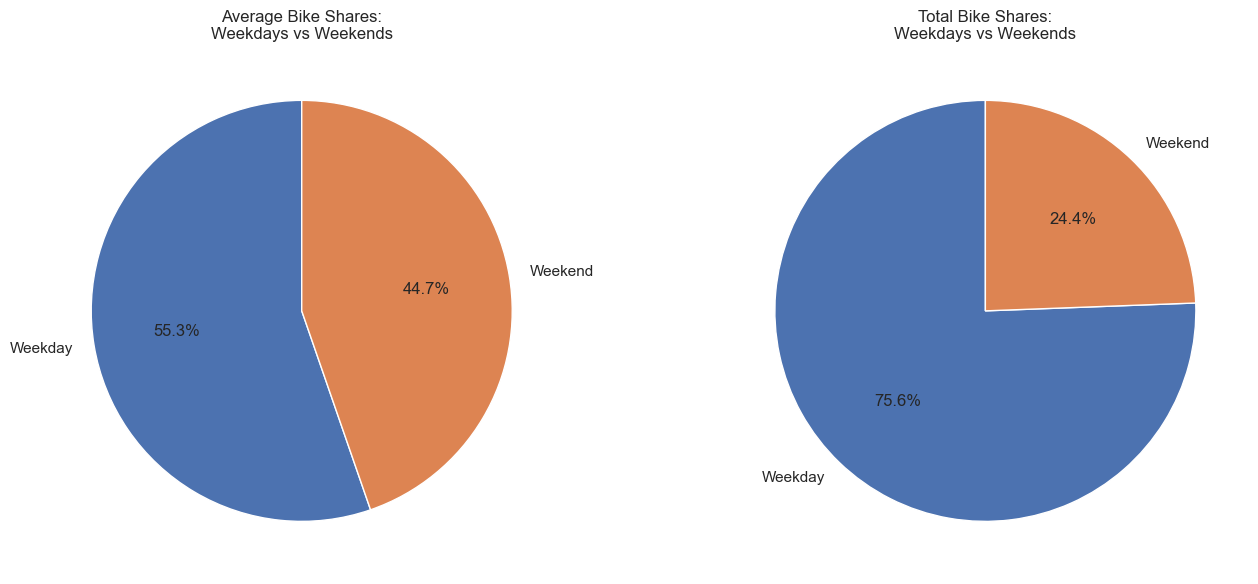

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Calculate average counts
avg_counts = bikes.groupby('is_weekend')['count'].mean()
weekday_avg = avg_counts[0]
weekend_avg = avg_counts[1]

# Calculate total counts
total_counts = bikes.groupby('is_weekend')['count'].sum()
weekday_total = total_counts[0]
weekend_total = total_counts[1]

# Pie chart 1: Average distribution
axes[0].pie(
    [weekday_avg, weekend_avg],
    labels=['Weekday', 'Weekend'],
    autopct='%1.1f%%',
    startangle=90
)
axes[0].set_title("Average Bike Shares:\nWeekdays vs Weekends")

# Pie chart 2: Total distribution
axes[1].pie(
    [weekday_total, weekend_total],
    labels=['Weekday', 'Weekend'],
    autopct='%1.1f%%',
    startangle=90
)
axes[1].set_title("Total Bike Shares:\nWeekdays vs Weekends")

plt.tight_layout()
plt.show()

### Bikes Hourly

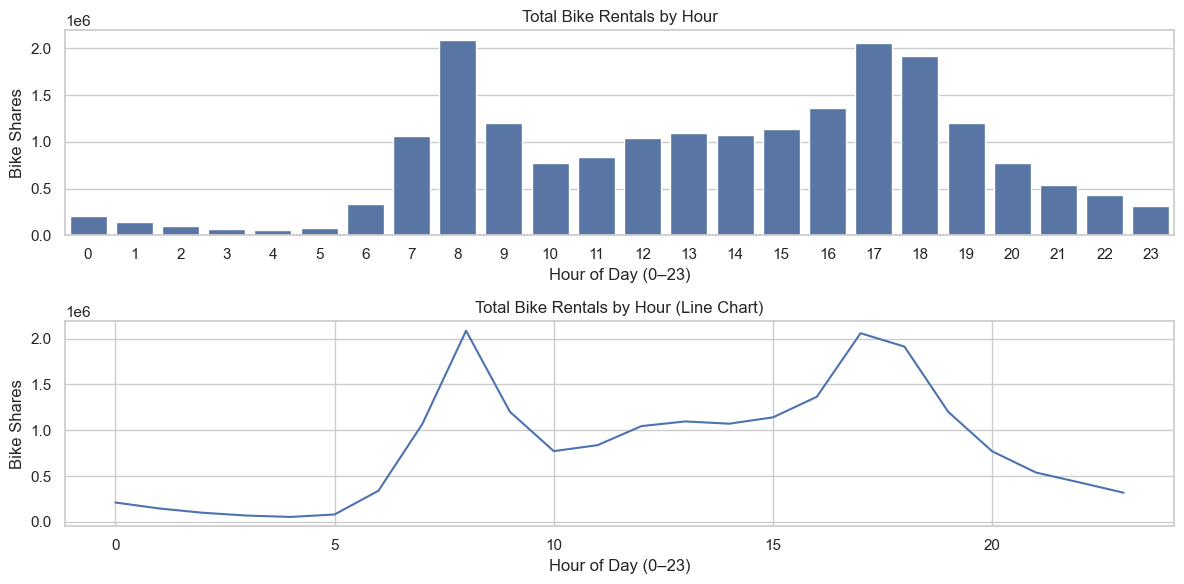

In [51]:
fig, axes = plt.subplots(2, 1, figsize=(12, 6))
sns.barplot(
    data=bikes,
    x='hour',
    y='count',
    estimator='sum',
    errorbar=None,
    ax=axes[0]
)

axes[0].set_title("Total Bike Rentals by Hour")
axes[0].set_xlabel("Hour of Day (0–23)")
axes[0].set_ylabel("Bike Shares")

sns.lineplot(
    data=bikes,
    x='hour',
    y='count',
    estimator='sum',
    errorbar=None,
    ax=axes[1]
)

axes[1].set_title("Total Bike Rentals by Hour (Line Chart)")
axes[1].set_xlabel("Hour of Day (0–23)")
axes[1].set_ylabel("Bike Shares")

plt.tight_layout()
plt.show()

### Bikes Shares by Weather Category

C:\Users\m\AppData\Local\Temp\ipykernel_18856\577940595.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars_total = sns.barplot(
C:\Users\m\AppData\Local\Temp\ipykernel_18856\577940595.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars_avg = sns.barplot(


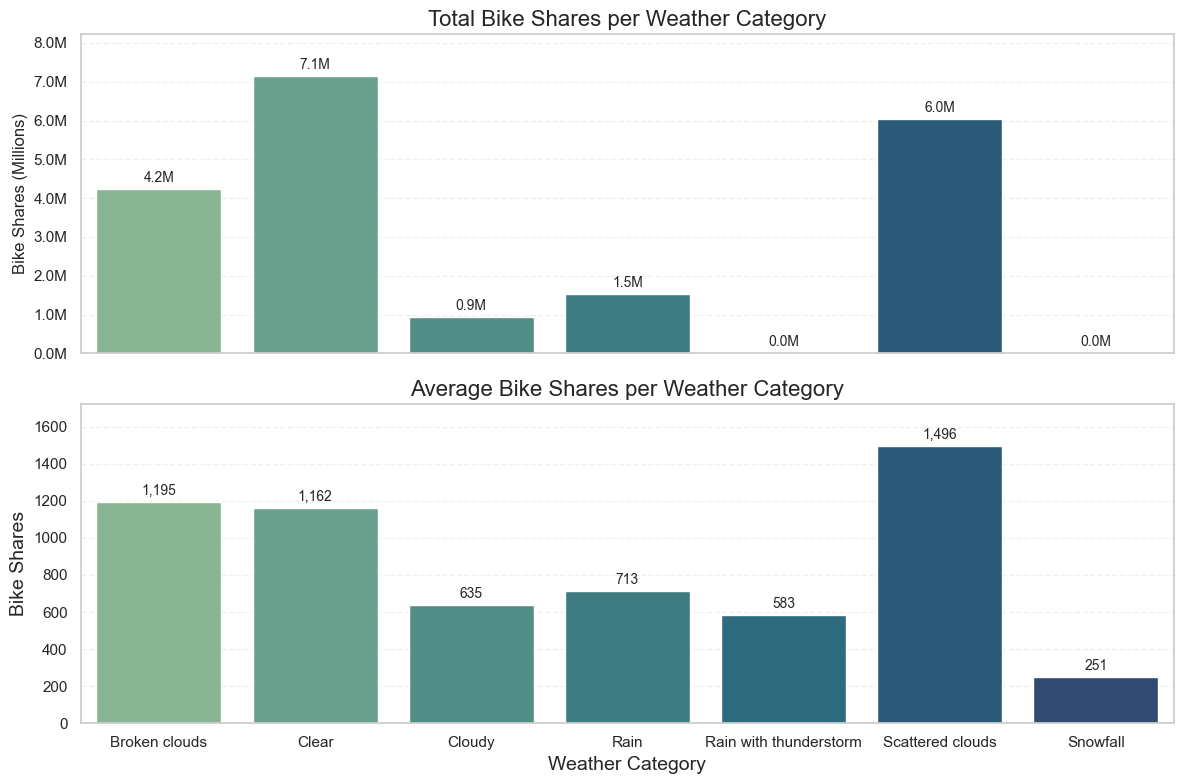

In [22]:
# Aggregate data
weather_total = bikes.groupby('weather')['count'].sum()
weather_avg = bikes.groupby('weather')['count'].mean()

# Create stacked subplots with shared x-axis
fig, axes = plt.subplots(2, 1, figsize=(12,8), sharex=True)

# ---------------------------
# 1) Total Bike Shares (Top)
# ---------------------------
bars_total = sns.barplot(
    x=weather_total.index,
    y=weather_total.values,
    palette='crest',
    errorbar=None,
    ax=axes[0]
)

axes[0].set_title("Total Bike Shares per Weather Category", fontsize=16)
axes[0].set_ylabel("Bike Shares (Millions)", fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.3)

# Format y-axis in millions
axes[0].yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M')
)

# Add headroom
axes[0].set_ylim(0, weather_total.max() * 1.15)

# Annotate bars
for bar in bars_total.patches:
    height = bar.get_height()
    axes[0].annotate(
        f'{height/1e6:.1f}M',
        (bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),
        textcoords='offset points',
        ha='center',
        va='bottom',
        fontsize=10
    )

# ---------------------------
# 2) Average Bike Shares (Bottom)
# ---------------------------
bars_avg = sns.barplot(
    x=weather_avg.index,
    y=weather_avg.values,
    palette='crest',
    errorbar=None,
    ax=axes[1]
)

axes[1].set_title("Average Bike Shares per Weather Category", fontsize=16)
axes[1].set_xlabel("Weather Category", fontsize=14)
axes[1].set_ylabel("Bike Shares", fontsize=14)
axes[1].grid(axis='y', linestyle='--', alpha=0.3)

# Add headroom
axes[1].set_ylim(0, weather_avg.max() * 1.15)

# Annotate bars
for bar in bars_avg.patches:
    height = bar.get_height()
    axes[1].annotate(
        f'{height:,.0f}',
        (bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),
        textcoords='offset points',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()

## Correlation between bike rentals and humidity, temperature, and wind speed.
For the following graphs, I use a binned scatterplot to show the relationships. This is because not all of the relationships are linear or smooth, scatterplots show the variability. Binned because the data size is very large, showing all inputs would make it harder to interpret the data visually. There are not clearly defined categories so using bar graphs wouldn't be ideal.

### Rentals vs Temperature

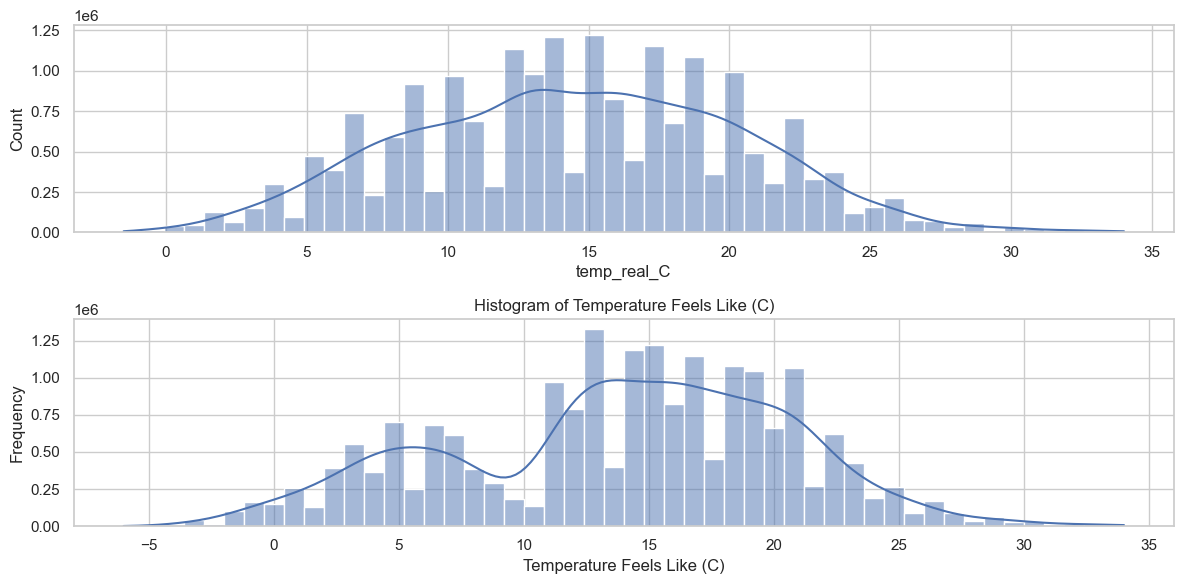

In [54]:
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

sns.histplot(
    x='temp_real_C',
    weights='count',
    data=bikes,
    bins=50,
    kde=True,
    ax=axes[0]
)

plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature Real (C)')


sns.histplot(
    x='temp_feels_like_C',
    weights='count',
    data=bikes,
    bins=50,
    kde=True,
    ax=axes[1]
)
plt.xlabel('Temperature Feels Like (C)')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature Feels Like (C)')

plt.tight_layout()
plt.show()

### Rentals vs Humidity

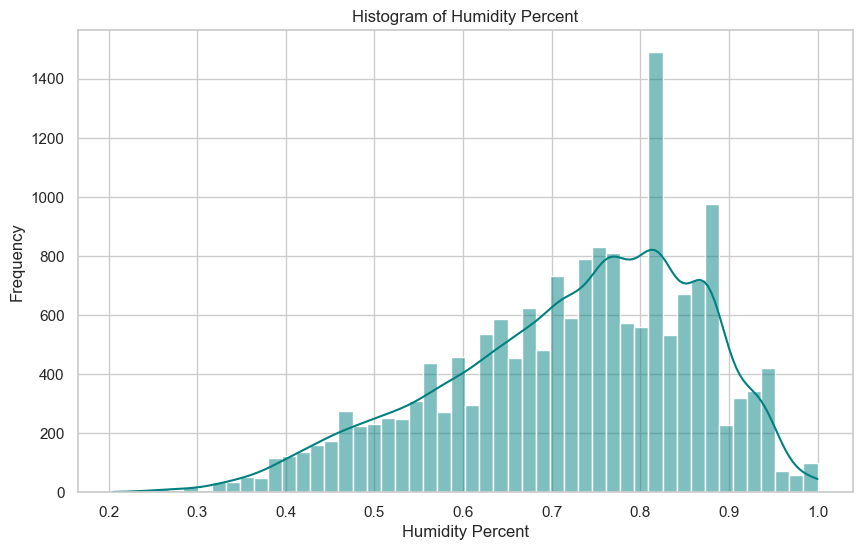

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(
    bikes['humidity_percent'],
    bins=50,
    kde=True,
    color="Teal"
)
plt.xlabel('Humidity Percent')
plt.ylabel('Frequency')
plt.title('Histogram of Humidity Percent')
plt.show()

### Rentals vs Wind Speed

C:\Users\m\AppData\Local\Temp\ipykernel_18856\846306736.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned = bikes.groupby(pd.cut(bikes[var], bins=bin_edges))['count'].mean()
C:\Users\m\AppData\Local\Temp\ipykernel_18856\846306736.py:69: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


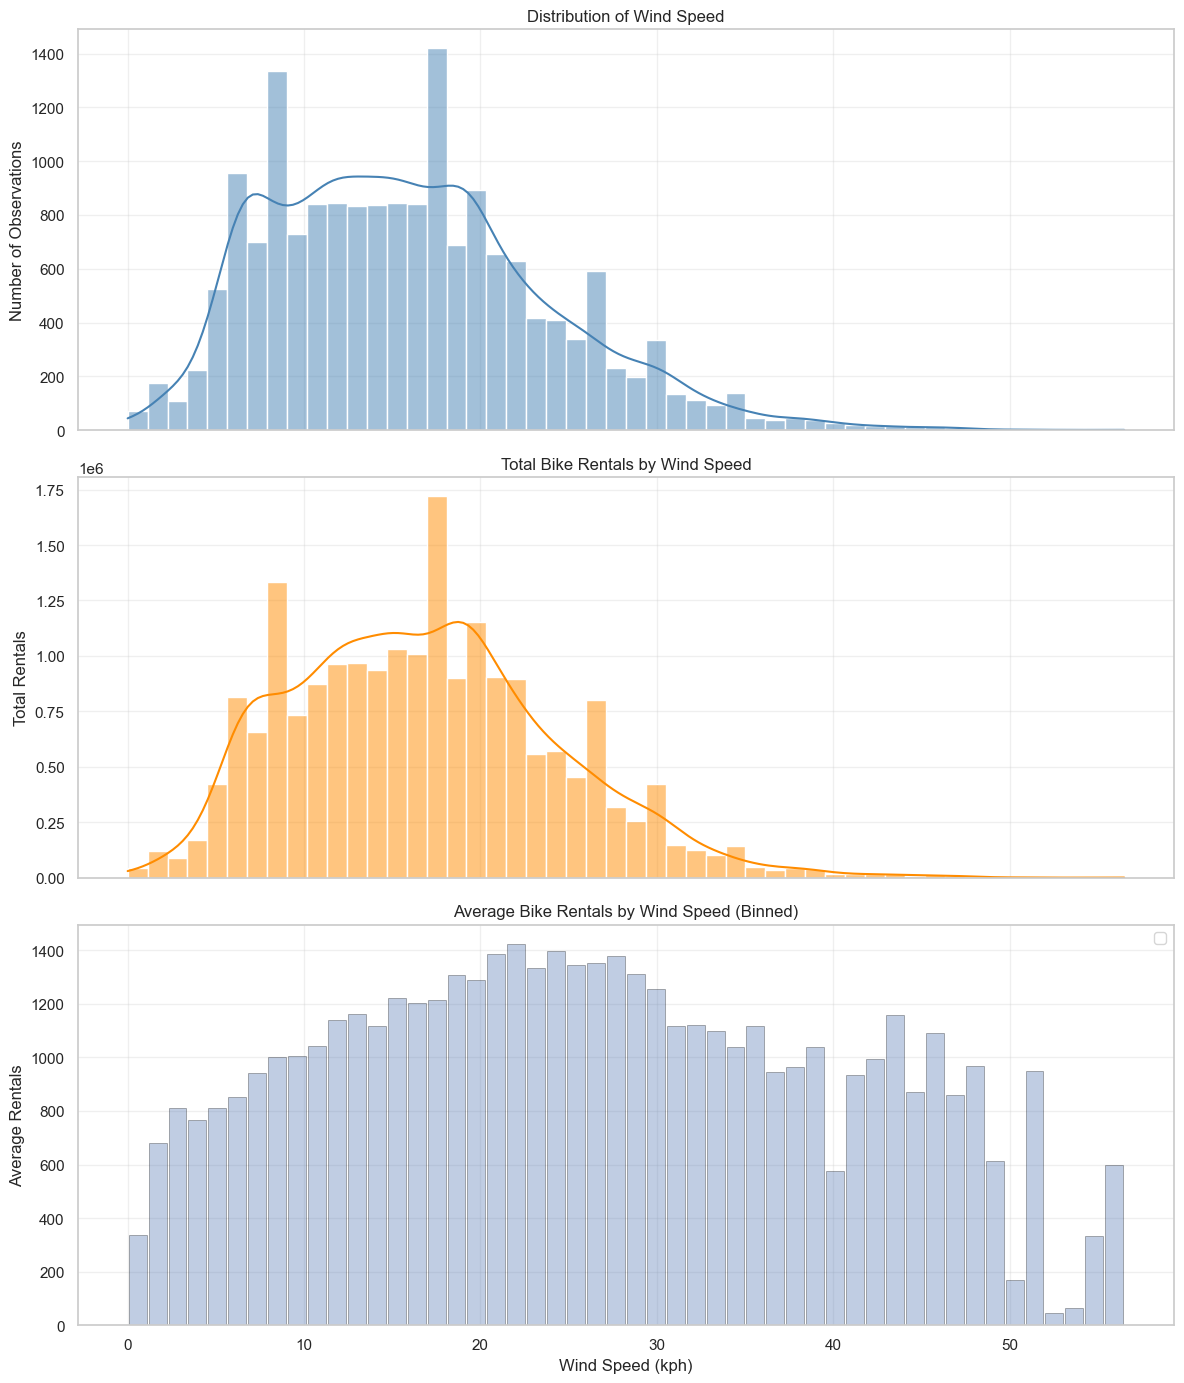

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.ndimage import gaussian_filter1d

bins = 50
gauss_sigma = 2.0      # larger = smoother trend
bar_alpha = 0.35       # transparency of bars
var = 'wind_speed_kph'


fig, axes = plt.subplots(3, 1, figsize=(12, 14), sharex=True)

# --------------------------------------------------
# 1) Unweighted histogram
# --------------------------------------------------
sns.histplot(x=var, 
             data=bikes, 
             bins=bins, 
             kde=True,
             color='steelblue',
             ax=axes[0])
axes[0].set_title('Distribution of Wind Speed')
axes[0].set_ylabel('Number of Observations')

# --------------------------------------------------
# 2) Weighted histogram
# --------------------------------------------------
sns.histplot(x=var, 
             weights='count', 
             data=bikes, 
             bins=bins, 
             kde=True,
             color='darkorange', 
             ax=axes[1])
axes[1].set_title('Total Bike Rentals by Wind Speed')
axes[1].set_ylabel('Total Rentals')

# --------------------------------------------------
# 3) Binned averages + Gaussian-smoothed trend
# --------------------------------------------------
bin_edges = np.linspace(bikes[var].min(), bikes[var].max(), bins + 1)
binned = bikes.groupby(pd.cut(bikes[var], bins=bin_edges))['count'].mean()

midpoints = np.array([iv.mid for iv in binned.index])
bar_width = (bin_edges[1] - bin_edges[0]) * 0.9

# Fill NaNs so smoothing spans full x-range
binned_series = pd.Series(binned.values, index=midpoints)
binned_filled = binned_series.interpolate(method='linear', limit_direction='both').fillna(0.0)

# Draw semi-transparent bars
ax = axes[2]
ax.bar(
    midpoints,
    binned_filled.values,
    width=bar_width,
    alpha=bar_alpha,
    edgecolor='black',
    linewidth=0.6,
    zorder=1
)

ax.set_title('Average Bike Rentals by Wind Speed (Binned)')
ax.set_ylabel('Average Rentals')
ax.set_xlabel('Wind Speed (kph)')
ax.legend()
ax.grid(alpha=0.3)

for a in axes:
    a.grid(alpha=0.3)

plt.tight_layout()
plt.show()

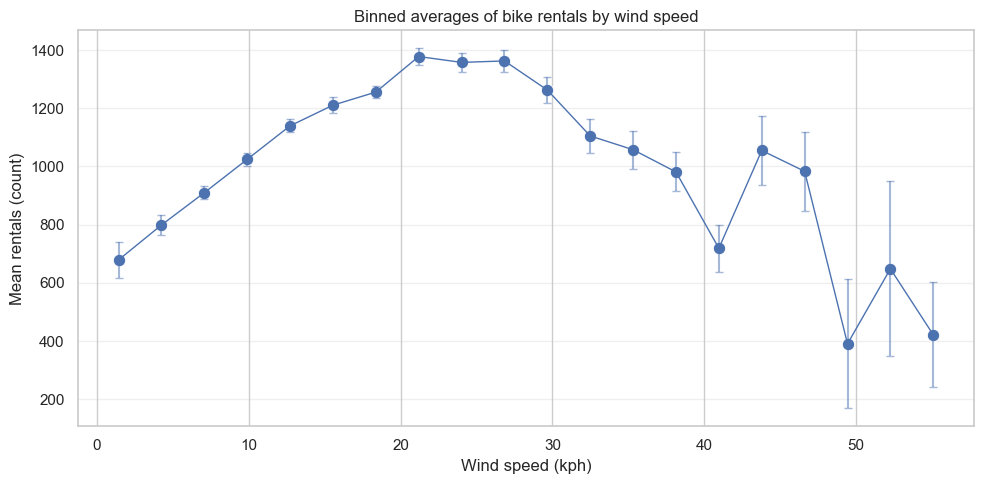

In [31]:
# binned_scatter.py
# Purpose: compute binned averages of `count` vs `wind_speed_kph` from `bikes` and plot them.
# Structure: 1) clean data, 2) create numeric bins, 3) aggregate mean count per bin, 4) plot scatter + line.
# Minimal error checking: drops NA in the two columns used.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

n_bins = 20   # change number of bins if you want finer/coarser grouping
figsize = (10, 5)

# create uniform bins between min and max wind speed
bin_edges = np.linspace(bikes['wind_speed_kph'].min(),
                        bikes['wind_speed_kph'].max(), 
                        n_bins + 1)

# bin the wind speed and group
bin_labels = pd.cut(bikes['wind_speed_kph'], bins=bin_edges)

binned = (bikes.assign(wind_bin=bin_labels)
          .groupby('wind_bin', observed=True)
          .agg(mean_count=('count', 'mean'),
               std_count=('count', 'std'),
               n=('count', 'size'))
          .reset_index())

# compute numeric bin centers for plotting
# each 'wind_bin' is an Interval; use .mid
binned['bin_center'] = binned['wind_bin'].apply(lambda iv: iv.mid)

# --- Plot ---
plt.figure(figsize=figsize)
ax = sns.scatterplot(data=binned, 
                     x='bin_center', 
                     y='mean_count', 
                     s=80 # point size
                     )

sns.lineplot(data=binned.sort_values('bin_center'), 
             x='bin_center', 
             y='mean_count', 
             ax=ax, linewidth=1)

# optional: add error bars for the standard error of the mean
binned['sem'] = binned['std_count'] / np.sqrt(binned['n'])
ax.errorbar(binned['bin_center'], binned['mean_count'], yerr=binned['sem'], fmt='none', alpha=0.5, capsize=3)



ax.set_xlabel('Wind speed (kph)')
ax.set_ylabel('Mean rentals (count)')
ax.set_title('Binned averages of bike rentals by wind speed')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# --- Optional smoothing (if you want a smoother trend instead of straight line) ---
# from scipy.ndimage import gaussian_filter1d
# smoothed = gaussian_filter1d(binned.sort_values('bin_center')['mean_count'].fillna(method='ffill'), sigma=2)
# ax.plot(binned.sort_values('bin_center')['bin_center'], smoothed, linestyle='--', linewidth=1)

In [33]:
# Writing the final dataframe to an excel file that we will use in our Tableau visualisations. 
# The file will be the 'london_bikes_final.xlsx' file and the sheet name is 'Data'
bikes.to_excel('london_bikes_final.xlsx', sheet_name='Data')